<a href="https://colab.research.google.com/github/lmcanavals/machine_learning/blob/main/0301_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass classifiers

#### Imports and important notes

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
import warnings
#warnings.filterwarnings('ignore')

#### Loading data

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

In [4]:
X, y = mnist.data, mnist.target

#### Exploring data

<ipython-input-5-3e1f38cd530b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(5, 10, i+1)


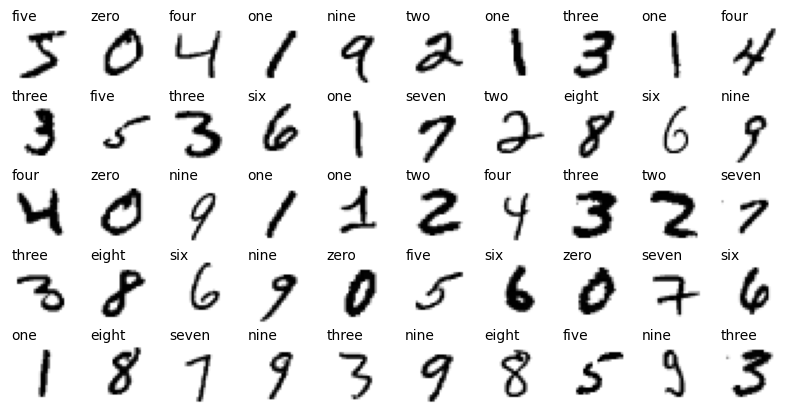

In [ ]:
plt.subplots(figsize=(10, 5))
labels = ["zero", "one", "two", "three", "four",
          "five", "six", "seven", "eight", "nine"]
for i in range(50):
    ax = plt.subplot(5, 10, i+1)
    idx = i #random.randint(0, 60000)
    ax.axis('off')
    ax.imshow(X[idx].reshape((28, 28)), cmap='gray_r')
    ax.text(0, 0, labels[int(y[idx])])
plt.show()

#### Partitioning Data

In [5]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val =  X[60000:], y[60000:]

## Support Vector Machine

In [7]:
from sklearn.svm import SVC

In [8]:
svmc = SVC(gamma='auto', random_state=42)
svmc.fit(X_train[:5000], y_train[:5000])

SVC(gamma='auto', random_state=42)

#### Training accuracy

In [11]:
svmc.predict(X_train[:1])

array(['5'], dtype=object)

In [9]:
pred_score = svmc.decision_function(X_train[:1])
pred_score.round(2)

array([[ 0.81,  8.04,  1.82,  2.82,  5.91,  9.3 ,  4.84,  6.97, -0.21,
         3.83]])

In [10]:
class_id = pred_score.argmax()
class_id

5

In [12]:
svmc.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [11]:
svmc.classes_[class_id]

'5'

In [13]:
svmc.decision_function_shape = "ovo"
pred_score_ovo = svmc.decision_function(X_train[:1])
pred_score_ovo.round(2)

array([[-0.15, -0.02, -0.03, -0.1 , -0.91, -0.04, -0.13,  0.04, -0.03,
         0.13,  0.12,  0.05, -0.77,  0.11,  0.02,  0.18,  0.12, -0.01,
        -0.09, -0.89, -0.03, -0.11,  0.05, -0.01, -0.08, -0.88, -0.02,
        -0.1 ,  0.06, -0.  , -0.81,  0.06, -0.03,  0.14,  0.07,  0.87,
         0.79,  0.94,  0.88, -0.09,  0.08,  0.01,  0.16,  0.1 , -0.07]])

## One vs Rest classifier

In [14]:
from sklearn.multiclass import OneVsRestClassifier

In [15]:
ovrc = OneVsRestClassifier(SVC(random_state=42))
ovrc.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [16]:
ovrc.predict(X_train[:1])

array(['5'], dtype='<U1')

## Error analysis

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

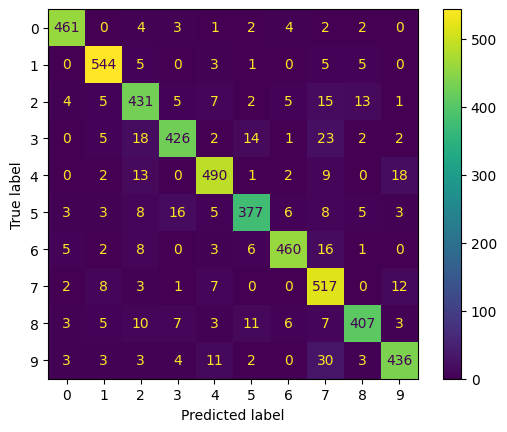

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
y_train_hat = cross_val_predict(svmc, X_train_scaled[:5000], y_train[:5000], cv=3)
ConfusionMatrixDisplay.from_predictions(y_train[:5000], y_train_hat)

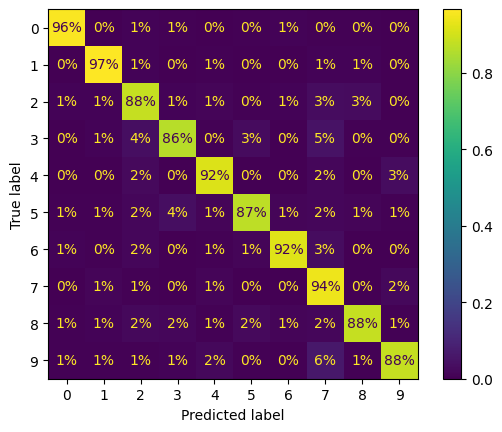

In [20]:
ConfusionMatrixDisplay.from_predictions(y_train[:5000], y_train_hat,
                                        normalize='true', values_format='.0%')


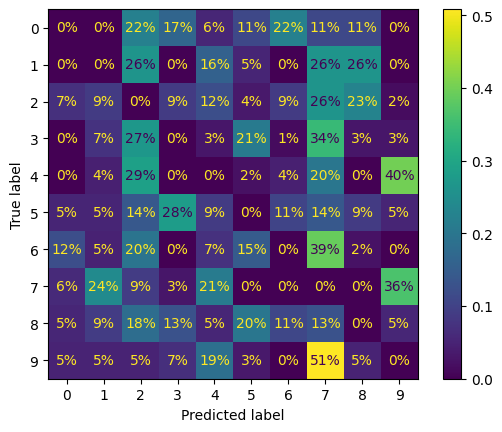

In [23]:
sample_weight = (y_train_hat != y_train[:5000])
ConfusionMatrixDisplay.from_predictions(y_train[:5000], y_train_hat,
                                        sample_weight=sample_weight,
                                        normalize='true', values_format='.0%')

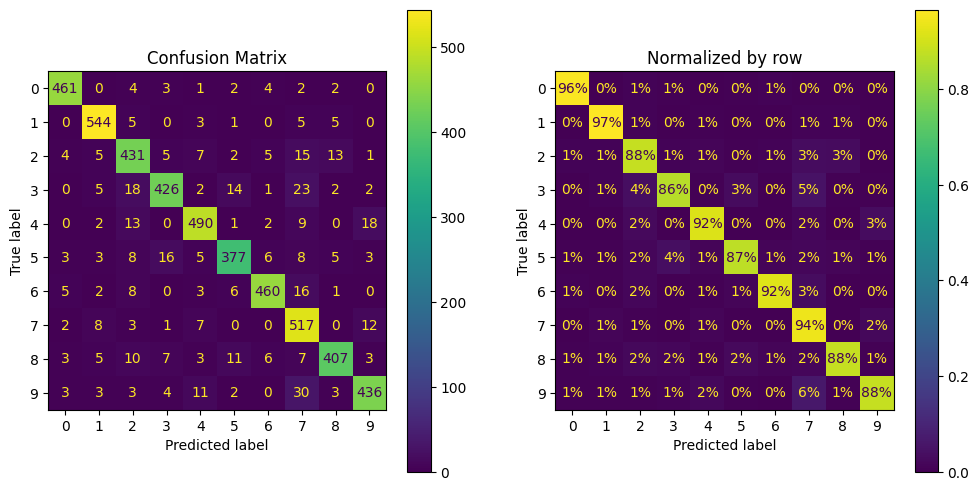

In [28]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axs[0].set_title("Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_train[:5000], y_train_hat, ax=axs[0])
axs[1].set_title("Normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train[:5000], y_train_hat,
                                        normalize='true', values_format='.0%',
                                        ax=axs[1])
plt.show()
